## What makes up a classification model? 

Classification means generalizing from examples to build a model (that is, a rule
that can automatically be applied to new, unclassified objects). It is one of the
fundamental tools in machine learning.

We can break it up into three parts:

• The structure of the model: In this, we use a threshold on a single feature.

• The search procedure: In this, we try every possible combination of feature
and threshold.

• The loss function: Using the loss function, we decide which of the possibilities
is less bad (because we can rarely talk about the perfect solution). We can use
the training error or just define this point the other way around and say that
we want the best accuracy. Traditionally, people want the loss function to
be minimum.

## The Iris Dataset

In general, we will call any measurement from our data as features.
Additionally, for each plant, the species was recorded. The question now is: if we
saw a new flower out in the field, could we make a good prediction about its species
from its measurements?

This is the supervised learning or classification problem; given labeled examples,
we can design a rule that will eventually be applied to other examples


## The first step is visualization

Because this dataset is so small, we can easily plot all of the points and all twodimensional
projections on a page. We will thus build intuitions that can then be
extended to datasets with many more dimensions and datapoints. Each subplot in
the following screenshot shows all the points projected into two of the dimensions.

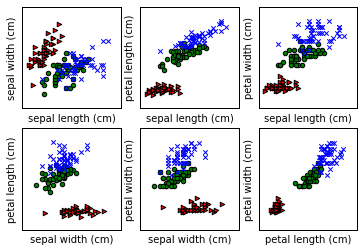

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']


pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
for i,(p0,p1) in enumerate(pairs):
    plt.subplot(2,3,i+1)
    for t,marker,c in zip(range(3),">ox","rgb"):
        plt.scatter(features[target == t,p0], features[target == t,p1], marker=marker, c=c)
    plt.xlabel(feature_names[p0])
    plt.ylabel(feature_names[p1])
    plt.xticks([])
    plt.yticks([])
plt.show()


Each subplot in
the following screenshot shows all the points projected into two of the dimensions.
The outlying group (triangles) are the Iris Setosa plants, while Iris Versicolor plants
are in the center (circle) and Iris Virginica are indicated with "x" marks. We can see
that there are two large groups: one is of Iris Setosa and another is a mixture of Iris
Versicolor and Iris Virginica.

## Building our first classification model

If the goal is to separate the three types of flower, we can immediately make a few
suggestions. For example, the petal length seems to be able to separate Iris Setosa
from the other two flower species on its own.

In [6]:
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()
features = data['data']
labels = data['target_names'][data['target']]

plength = features[:,2]
is_setosa = (labels == 'setosa')
print('Maximum of setosa: {0}.'.format(plength[is_setosa].max()))
print('Minimum of others: {0}.'.format(plength[~is_setosa].min()))



Maximum of setosa: 1.9.
Minimum of others: 3.0.


Therefore, we can build a simple model: if the petal length
is smaller than two, this is an Iris Setosa flower; otherwise, it is either Iris Virginica or
Iris Versicolor.

if features[:,2] < 2: print ('Iris Setosa')

else: print ('Iris Virginica or Iris Versicolour')

This is our first model, and it works very well in that it separates the Iris Setosa
flowers from the other two species without making any mistakes.

###### We cannot immediately see what the best threshold is for distinguishing Iris Virginica from Iris Versicolor.

In [7]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
data = load_iris()
features = data['data']
labels = data['target_names'][data['target']]


setosa = (labels == 'setosa')
#We first select only the non-Setosa features and labels:
features = features[~setosa]
labels = labels[~setosa]
#we build a new Boolean array, virginica, using an equality comparison on labels.
virginica = (labels == 'virginica')

#we run a loop over all possible features and thresholds to see which one results in better accuracy.
best_acc = -1.0
for fi in range(features.shape[1]):
    ## We are going to generate all possible threshold for this feature
    thresh = features[:,fi].copy()
    thresh.sort()
    ## Now test all thresholds:
    for t in thresh:
        #compare the predictions, pred,with the actual labels, virginica.
        pred = (features[:,fi] > t)
        acc = (pred == virginica).mean()
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            #select the best model
            best_t = t
print('Best cut is {0} on feature {1}, which achieves accuracy of {2:.1%}.'.format(best_t,best_fi,best_acc))



Best cut is 1.6 on feature 3, which achieves accuracy of 94.0%.


To apply it to a new example, we perform the following:

if example[best_fi] > t: print 'virginica'

else: print 'versicolor'

#### We can visualize the decision boundary. 
In the
following screenshot, we see two regions: one is white and the other is shaded in
grey. Anything that falls in the white region will be called Iris Virginica and anything
that falls on the shaded side will be classified as Iris Versicolor:

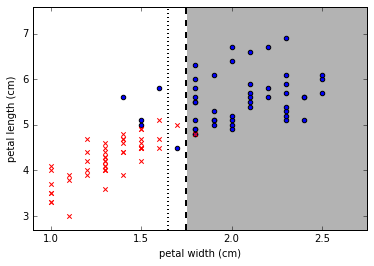

In [9]:
COLOUR_FIGURE = False

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
data = load_iris()
features = data['data']
feature_names = data['feature_names']
species = data['target_names'][data['target']]

setosa = (species == 'setosa')
features = features[~setosa]
species = species[~setosa]
virginica = species == 'virginica'

t = 1.75
p0,p1 = 3,2

if COLOUR_FIGURE:
    area1c = (1.,.8,.8)
    area2c = (.8,.8,1.)
else:
    area1c = (1.,1,1)
    area2c = (.7,.7,.7)

x0,x1 =[features[:,p0].min()*.9,features[:,p0].max()*1.1]
y0,y1 =[features[:,p1].min()*.9,features[:,p1].max()*1.1]

plt.fill_between([t,x1],[y0,y0],[y1,y1],color=area2c)
plt.fill_between([x0,t],[y0,y0],[y1,y1],color=area1c)
plt.plot([t,t],[y0,y1],'k--',lw=2)
plt.plot([t-.1,t-.1],[y0,y1],'k:',lw=2)
plt.scatter(features[virginica,p0], features[virginica,p1], c='b', marker='o')
plt.scatter(features[~virginica,p0], features[~virginica,p1], c='r', marker='x')
plt.ylim(y0,y1)
plt.xlim(x0,x1)
plt.xlabel(feature_names[p0])
plt.ylabel(feature_names[p1])
plt.show()

In a threshold model, the decision boundary will always be a line that is parallel to
one of the axes. The plot in the preceding screenshot shows the decision boundary
and the two regions where the points are classified as either white or grey. It also
shows (as a dashed line) an alternative threshold that will achieve exactly the same
accuracy. Our method chose the first threshold, but that was an arbitrary choice.

## Building more complex classifiers

### Nearest neighbor classification

In [25]:
import numpy as np

def load_dataset(dataset_name):
    '''
    data,labels = load_dataset(dataset_name)

    Load a given dataset

    Returns
    -------
    data : numpy ndarray
    labels : list of str
    '''
    data = []
    labels = []
    with open('{0}.tsv'.format(dataset_name)) as ifile:
        for line in ifile:
            tokens = line.strip().split('\t')
            data.append([float(tk) for tk in tokens[:-1]])
            labels.append(tokens[-1])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

features,labels = load_dataset('seeds')
labels = labels == 'Canadian'

def learn_model(features, labels):
    best_acc = -1.0
    for fi in range(features.shape[1]):
        thresh = features[:,fi].copy()
        thresh.sort()
        for t in thresh:
            pred = (features[:,fi] > t)
            acc = (pred == labels).mean()
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
    return best_t, best_fi

def apply_model(features, model):
    t, fi = model
    return features[:,fi] > t

def accuracy(features, labels, model):
    preds = apply_model(features, model)
    return np.mean(preds == labels)


error = 0.0
for fold in range(10):
    training = np.ones(len(features), bool)
    training[fold::10] = 0
    testing = ~training
    model = learn_model(features[training], labels[training])
    test_error = accuracy(features[testing], labels[testing], model)
    error += test_error

error /= 10.0

print('Ten fold cross-validated error was {0:.1%}.'.format(error))

features -= features.mean(0)
features /= features.std(0)
error = cross_validate(features, labels)
print('Ten fold cross-validated error after z-scoring was {0:.1%}.'.format(error))


Ten fold cross-validated error was 73.8%.
Ten fold cross-validated error after z-scoring was 73.8%.


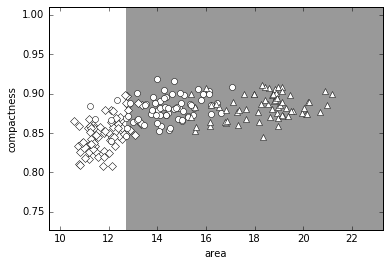

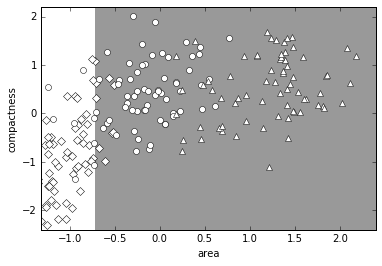

In [27]:
from matplotlib.colors import ListedColormap

feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel',
    'asymmetry coefficien',
    'length of kernel groove',
]


def train_plot(features, labels):
    y0,y1 = features[:,2].min()*.9, features[:,2].max()*1.1
    x0,x1 = features[:,0].min()*.9, features[:,0].max()*1.1
    X = np.linspace(x0,x1,100)
    Y = np.linspace(y0,y1,100)
    X,Y = np.meshgrid(X,Y)

    model = learn_model(features[:,(0,2)], np.array(labels))
    C = apply_model(np.vstack([X.ravel(),Y.ravel()]).T, model).reshape(X.shape)
    if COLOUR_FIGURE:
        cmap = ListedColormap([(1.,.6,.6),(.6,1.,.6),(.6,.6,1.)])
    else:
        cmap = ListedColormap([(1.,1.,1.),(.2,.2,.2),(.6,.6,.6)])
    plt.xlim(x0,x1)
    plt.ylim(y0,y1)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[2])
    plt.pcolormesh(X,Y,C, cmap=cmap)
    if COLOUR_FIGURE:
        cmap = ListedColormap([(1.,.0,.0),(.0,1.,.0),(.0,.0,1.)])
        plt.scatter(features[:,0], features[:,2], c=labels, cmap=cmap)
    else:
        for lab,ma in zip(range(3), "Do^"):
            plt.plot(features[labels == lab,0], features[labels == lab,2], ma, c=(1.,1.,1.))


features,labels = load_dataset('seeds')
names = sorted(set(labels))
labels = np.array([names.index(ell) for ell in labels])

train_plot(features, labels)
plt.show()

features -= features.mean(0)
features /= features.std(0)
train_plot(features, labels)
plt.show()
